In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_rel_ood_perf
)

pd.options.display.max_rows = 100

In [2]:
train_years = [
    '2009_2010_2011_2012',
    '2009_2010_2011_2012_2013',
]

y_axis = {
    'auc':{
        'lim':[-0.3, 0.1],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.4, 0.1],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[-0.01, 0.1],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.4],
        'label':'BCE Loss'
    }
}
tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}
algos = {
    'erm':'ERM (Baseline)',
    'irm':'IRM',
    'dro':'GroupDRO',
    'coral':'CORAL', 
    'adversarial':'AL',
}
metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration'
}


#### ID Performance

In [3]:
for year in train_years:
    algos['erm'] = f'ERM[{year[2:4]}-{year[-2:]}]'
    algos['irm'] = f'IRM[{year[2:4]}-{year[-2:]}]'
    algos['dro'] = f'GroupDRO[{year[2:4]}-{year[-2:]}]'
    algos['coral'] = f'CORAL[{year[2:4]}-{year[-2:]}]'
    algos['adversarial'] = f'AL[{year[2:4]}-{year[-2:]}]'
    
    df = get_result_table(
        train_year=year,
        tasks=tasks,
        algos=algos,
        metrics=metrics,
    )
    
    print(f"ID Performance of {year[2:4]}-{year[-2:]} Models")
    display(df)

ID Performance of 09-12 Models


Algorithm                                     ERM[09-12]  \
Metric      Task                                           
AUROC       Admission to ICU        0.834 (0.816, 0.852)   
            In-Hospital Mortality   0.821 (0.794, 0.845)   
            LOS > 7 Days            0.751 (0.739, 0.763)   
            Readmission in 30 Days   0.754 (0.73, 0.777)   
AUPRC       Admission to ICU        0.348 (0.303, 0.394)   
            In-Hospital Mortality    0.094 (0.074, 0.12)   
            LOS > 7 Days            0.445 (0.422, 0.469)   
            Readmission in 30 Days  0.225 (0.189, 0.265)   
Calibration Admission to ICU        0.008 (0.004, 0.013)   
            In-Hospital Mortality   0.004 (0.002, 0.006)   
            LOS > 7 Days            0.012 (0.007, 0.018)   
            Readmission in 30 Days   0.006 (0.003, 0.01)   

Algorithm                                     IRM[09-12]  \
Metric      Task                                           
AUROC       Admission to ICU        0.834 (0.815, 0.853)   
            In-Hospital Mortality   0.821 (0.795, 0.843)   
            LOS > 7 Days             0.75 (0.738, 0.763)   
            Readmission in 30 Days  0.755 (0.733, 0.776)   
AUPRC       Admission to ICU        0.348 (0.301, 0.396)   
            In-Hospital Mortality   0.093 (0.074, 0.116)   
            LOS > 7 Days             0.444 (0.42, 0.466)   
            Readmission in 30 Days  0.224 (0.189, 0.263)   
Calibration Admission to ICU        0.008 (0.004, 0.012)   
            In-Hospital Mortality   0.005 (0.003, 0.008)   
            LOS > 7 Days            0.011 (0.007, 0.016)   
            Readmission in 30 Days  0.006 (0.003, 0.009)   

Algorithm                                GroupDRO[09-12]  \
Metric      Task                                           
AUROC       Admission to ICU        0.834 (0.816, 0.851)   
            In-Hospital Mortality   0.824 (0.799, 0.848)   
            LOS > 7 Days             0.752 (0.74, 0.764)   
            Readmission in 30 Days  0.754 (0.732, 0.777)   
AUPRC       Admission to ICU        0.348 (0.306, 0.395)   
            In-Hospital Mortality   0.096 (0.077, 0.121)   
            LOS > 7 Days            0.445 (0.422, 0.468)   
            Readmission in 30 Days  0.225 (0.192, 0.262)   
Calibration Admission to ICU        0.008 (0.004, 0.012)   
            In-Hospital Mortality   0.004 (0.002, 0.007)   
            LOS > 7 Days            0.013 (0.008, 0.018)   
            Readmission in 30 Days   0.006 (0.003, 0.01)   

Algorithm                                   CORAL[09-12]             AL[09-12]  
Metric      Task                                                                
AUROC       Admission to ICU        0.835 (0.815, 0.852)  0.835 (0.817, 0.852)  
            In-Hospital Mortality   0.827 (0.802, 0.853)  0.822 (0.797, 0.847)  
            LOS > 7 Days            0.751 (0.738, 0.764)   0.75 (0.738, 0.762)  
            Readmission in 30 Days  0.755 (0.733, 0.777)  0.754 (0.733, 0.777)  
AUPRC       Admission to ICU        0.362 (0.314, 0.406)  0.348 (0.303, 0.394)  
            In-Hospital Mortality   0.107 (0.085, 0.135)  0.095 (0.075, 0.121)  
            LOS > 7 Days             0.444 (0.42, 0.468)  0.442 (0.418, 0.464)  
            Readmission in 30 Days  0.225 (0.193, 0.262)  0.224 (0.193, 0.262)  
Calibration Admission to ICU        0.007 (0.003, 0.011)   0.006 (0.003, 0.01)  
            In-Hospital Mortality   0.006 (0.004, 0.008)  0.003 (0.002, 0.006)  
            LOS > 7 Days            0.011 (0.006, 0.017)   0.01 (0.006, 0.015)  
            Readmission in 30 Days   0.006 (0.003, 0.01)  0.007 (0.003, 0.011)

ID Performance of 09-13 Models


Algorithm                                     ERM[09-13]  \
Metric      Task                                           
AUROC       Admission to ICU         0.835 (0.82, 0.851)   
            In-Hospital Mortality    0.819 (0.794, 0.84)   
            LOS > 7 Days             0.759 (0.748, 0.77)   
            Readmission in 30 Days  0.744 (0.722, 0.767)   
AUPRC       Admission to ICU        0.362 (0.322, 0.404)   
            In-Hospital Mortality   0.105 (0.085, 0.131)   
            LOS > 7 Days            0.453 (0.432, 0.472)   
            Readmission in 30 Days  0.223 (0.189, 0.257)   
Calibration Admission to ICU        0.009 (0.005, 0.012)   
            In-Hospital Mortality   0.004 (0.002, 0.006)   
            LOS > 7 Days            0.006 (0.003, 0.011)   
            Readmission in 30 Days   0.01 (0.006, 0.013)   

Algorithm                                     IRM[09-13]  \
Metric      Task                                           
AUROC       Admission to ICU         0.835 (0.82, 0.851)   
            In-Hospital Mortality   0.818 (0.796, 0.841)   
            LOS > 7 Days            0.758 (0.748, 0.769)   
            Readmission in 30 Days  0.744 (0.722, 0.765)   
AUPRC       Admission to ICU          0.36 (0.32, 0.403)   
            In-Hospital Mortality     0.11 (0.09, 0.137)   
            LOS > 7 Days            0.449 (0.429, 0.471)   
            Readmission in 30 Days  0.225 (0.193, 0.259)   
Calibration Admission to ICU        0.007 (0.003, 0.011)   
            In-Hospital Mortality   0.005 (0.003, 0.007)   
            LOS > 7 Days             0.005 (0.003, 0.01)   
            Readmission in 30 Days  0.008 (0.004, 0.011)   

Algorithm                                GroupDRO[09-13]  \
Metric      Task                                           
AUROC       Admission to ICU         0.836 (0.82, 0.851)   
            In-Hospital Mortality    0.82 (0.795, 0.843)   
            LOS > 7 Days             0.759 (0.748, 0.77)   
            Readmission in 30 Days  0.745 (0.724, 0.765)   
AUPRC       Admission to ICU        0.362 (0.323, 0.402)   
            In-Hospital Mortality   0.108 (0.087, 0.133)   
            LOS > 7 Days            0.453 (0.432, 0.475)   
            Readmission in 30 Days  0.225 (0.193, 0.263)   
Calibration Admission to ICU        0.008 (0.004, 0.012)   
            In-Hospital Mortality   0.005 (0.003, 0.007)   
            LOS > 7 Days            0.006 (0.003, 0.011)   
            Readmission in 30 Days  0.009 (0.005, 0.012)   

Algorithm                                   CORAL[09-13]             AL[09-13]  
Metric      Task                                                                
AUROC       Admission to ICU         0.836 (0.82, 0.852)   0.836 (0.82, 0.849)  
            In-Hospital Mortality   0.822 (0.796, 0.842)  0.821 (0.796, 0.842)  
            LOS > 7 Days             0.759 (0.748, 0.77)  0.758 (0.747, 0.769)  
            Readmission in 30 Days  0.744 (0.723, 0.766)  0.747 (0.724, 0.768)  
AUPRC       Admission to ICU          0.37 (0.33, 0.412)  0.362 (0.322, 0.401)  
            In-Hospital Mortality   0.114 (0.091, 0.141)    0.113 (0.09, 0.14)  
            LOS > 7 Days            0.452 (0.432, 0.474)   0.451 (0.43, 0.472)  
            Readmission in 30 Days  0.224 (0.195, 0.256)  0.227 (0.194, 0.258)  
Calibration Admission to ICU         0.007 (0.003, 0.01)  0.008 (0.005, 0.012)  
            In-Hospital Mortality   0.003 (0.002, 0.005)  0.004 (0.002, 0.007)  
            LOS > 7 Days            0.006 (0.002, 0.012)  0.006 (0.003, 0.011)  
            Readmission in 30 Days   0.01 (0.006, 0.013)  0.008 (0.005, 0.012)

#### OOD Performance

Out-of-Distribution Results of ERM[09-12] and DG[09-12] algorithms


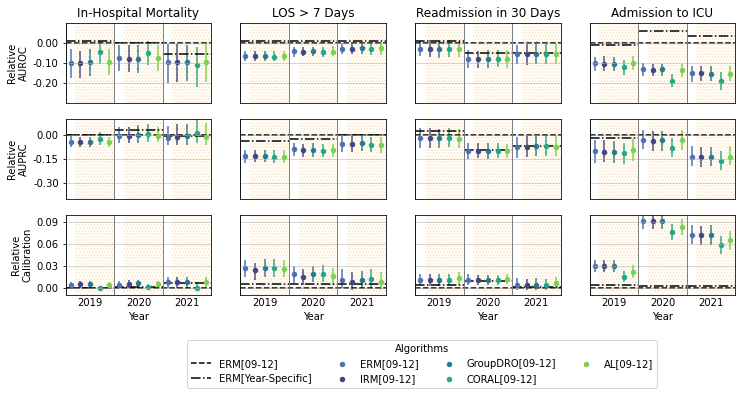

Out-of-Distribution Results of ERM[09-13] and DG[09-13] algorithms


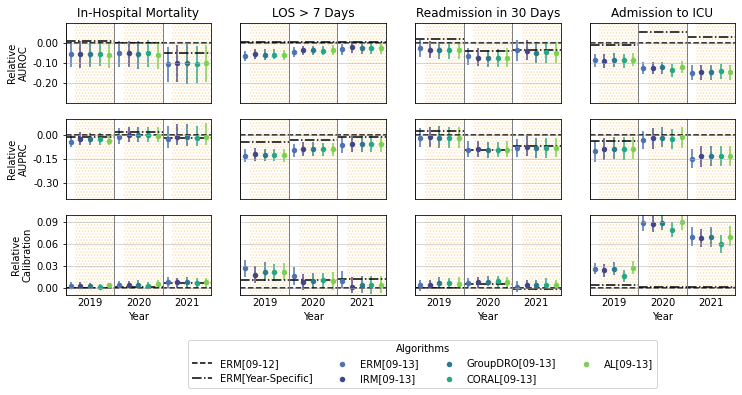

In [4]:
for year in train_years:
    
    algos['erm'] = f'ERM[{year[2:4]}-{year[-2:]}]'
    algos['irm'] = f'IRM[{year[2:4]}-{year[-2:]}]'
    algos['dro'] = f'GroupDRO[{year[2:4]}-{year[-2:]}]'
    algos['coral'] = f'CORAL[{year[2:4]}-{year[-2:]}]'
    algos['adversarial'] = f'AL[{year[2:4]}-{year[-2:]}]'
    
    print(f'Out-of-Distribution Results of ERM[{year[2:4]}-{year[-2:]}] and DG[{year[2:4]}-{year[-2:]}] algorithms')
    
    plot_rel_ood_perf(
        train_year=year,
        tasks=tasks,
        metrics=metrics,
        algos=algos,
        y_axis=y_axis,
        legend_ncols=4
    )